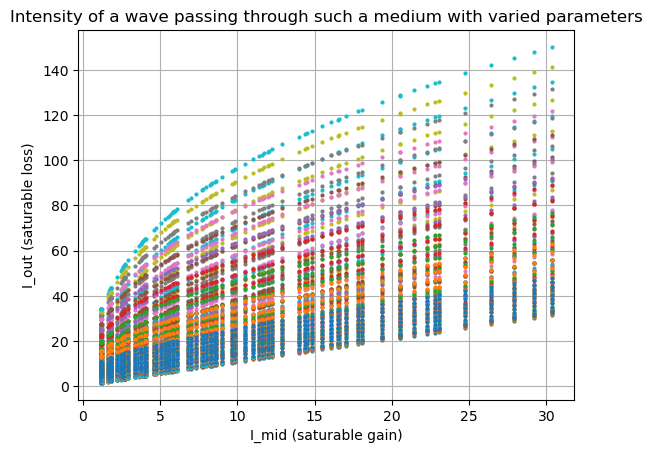

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import sympy as sp

# sample parameter values
alpha_m_values = np.linspace(0.1, 2.0, 10)
alpha_0_values = np.linspace(0.1, 2.0, 10)
I_m_values = np.linspace(5.0, 50.0, 10)
I_0_values = np.linspace(5.0, 50.0, 10)


# constants
L = 1.0  # length of the medium
I_in = 1.0  # initial input intensity

# initialize I_mid and I_out
I_mid_symbolic = sp.symbols('I_mid')
I_out_symbolic = sp.symbols('I_out')

def solve_for_I_mid(I_mid, I_m, alpha_m):
    return np.log(I_mid / I_in) + (I_mid - I_in) / I_m - 2 * alpha_m * L

def solve_for_I_out(I_out, I_mid, I_0, alpha_0):
    return np.log(I_out / I_mid) + (I_out - I_mid) / I_0 - 2 * alpha_0 * L

for alpha_m in alpha_m_values:
    for alpha_0 in alpha_0_values:
        for I_m in I_m_values:
            for I_0 in I_0_values:
                # solve for I_mid in the first stage equation (saturable gain)
                I_mid_solution = newton(solve_for_I_mid, x0=0.5, args=(I_m, alpha_m), tol=1e-9)  # start with an initial guess of 1.0...
                #print("I_mid =", I_mid_solution)
                # solve for I_out in the second stage equation (saturable loss)
                I_out_solution = newton(solve_for_I_out, x0=0.5, args=(I_mid_solution, I_0, alpha_0), tol=1e-9)
                #print("I_out =", I_out_solution)
                plt.plot(I_mid_solution, I_out_solution, marker='o', linestyle='-', markersize=2, label=f"α_m={alpha_m}, α_0={alpha_0}, I_m={I_m}, I_0={I_0}") 


plt.xlabel('I_mid (saturable gain)')
plt.ylabel('I_out (saturable loss)')
plt.title('Intensity of a wave passing through such a medium with varied parameters')
#plt.legend()
plt.grid(True)
plt.show()


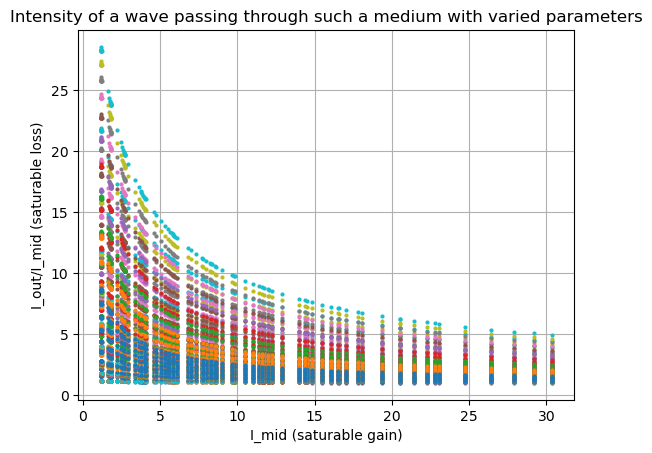

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import sympy as sp

# sample parameter values
alpha_m_values = np.linspace(0.1, 2.0, 10)
alpha_0_values = np.linspace(0.1, 2.0, 10)
I_m_values = np.linspace(5.0, 50.0, 10)
I_0_values = np.linspace(5.0, 50.0, 10)


# constants
L = 1.0  # length of the medium
I_in = 1.0  # initial input intensity

# initialize I_mid and I_out
I_mid_symbolic = sp.symbols('I_mid')
I_out_symbolic = sp.symbols('I_out')

def solve_for_I_mid(I_mid, I_m, alpha_m):
    return np.log(I_mid / I_in) + (I_mid - I_in) / I_m - 2 * alpha_m * L

def solve_for_I_out(I_out, I_mid, I_0, alpha_0):
    return np.log(I_out / I_mid) + (I_out - I_mid) / I_0 - 2 * alpha_0 * L

for alpha_m in alpha_m_values:
    for alpha_0 in alpha_0_values:
        for I_m in I_m_values:
            for I_0 in I_0_values:
                # solve for I_mid in first stage equation (saturable gain)
                # start with an initial guess of 1.0...
                I_mid_solution = newton(solve_for_I_mid, x0=0.5, args=(I_m, alpha_m), tol=1e-9) 
                #print("I_mid =", I_mid_solution)
                # solve for I_out in second stage equation (saturable loss)
                I_out_solution = newton(solve_for_I_out, x0=0.5, args=(I_mid_solution, I_0, alpha_0), tol=1e-9)
                #print("I_out =", I_out_solution)
                plt.plot(I_mid_solution, I_out_solution/I_mid_solution, marker='o', linestyle='-', markersize=2, label=f"α_m={alpha_m}, α_0={alpha_0}, I_m={I_m}, I_0={I_0}") 


plt.xlabel('I_mid (saturable gain)')
plt.ylabel('I_out/I_mid (saturable loss)')
plt.title('Intensity of a wave passing through such a medium with varied parameters')
#plt.legend(loc='upper right')
plt.grid(True)
plt.show()


1st plot is I_mid vs. I_out
2nd plot is I_mid vs. I_out/I_mid

Below is a description of the behavior of plot 1.

The diagram suggests that intensity begins to saturate at stronger signals.

For weaker input intensities, the output intensity increases faster initially, indicating a gain in the medium. However, as the input intensity increases, the output intensity begins to saturate and saturable loss starts to increase faster.

The parameters of alpha_m, alpha_0, I_m, and I_0 influence the point at which saturation starts and how fast saturation occurs. Higher values of alpha_m and alpha_0 tend to make the saturable gain and saturable loss more pronounced, whereas lower values of these parameters are correlated to a more gradual transition from gain to saturation. It appears that I_m and I_0 influence the point at which saturation occurs, with higher values causing a delay in the onset of saturation.